from https://observablehq.com/@uwdata/introduction-to-vega-lite

In [1]:
import vl from "npm:vega-lite-api"
import { display } from "https://deno.land/x/display@v0.1.1/mod.ts"

In [2]:
const df = [
  {"city": "Seattle",  "month": "Apr", "precip": 2.68},
  {"city": "Seattle",  "month": "Aug", "precip": 0.87},
  {"city": "Seattle",  "month": "Dec", "precip": 5.31},
  {"city": "New York", "month": "Apr", "precip": 3.94},
  {"city": "New York", "month": "Aug", "precip": 4.13},
  {"city": "New York", "month": "Dec", "precip": 3.58},
  {"city": "Chicago",  "month": "Apr", "precip": 3.62},
  {"city": "Chicago",  "month": "Aug", "precip": 3.98},
  {"city": "Chicago",  "month": "Dec", "precip": 2.56},
];

In [5]:
let plot = vl.markPoint()
  .data(df)
display(plot)

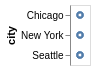

In [6]:
plot = vl.markPoint()
  .data(df)
  .encode(vl.y().field('city').type('nominal'))
display(plot)

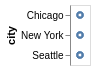

In [7]:
plot = vl.markPoint()
  .data(df)
  .encode(vl.y().fieldN('city'))

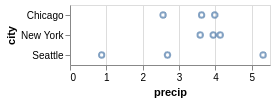

In [8]:
plot = vl.markPoint()
  .data(df)
  .encode(
    vl.x().fieldQ('precip'),
    vl.y().fieldN('city')
  )

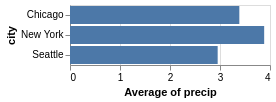

In [9]:
plot = vl.markBar()
  .data(df)
  .encode(
    vl.x().average('precip'),
    vl.y().fieldN('city')
  )

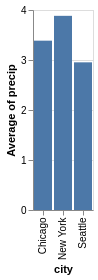

In [10]:
plot = vl.markBar()
  .data(df)
  .encode(
    vl.y().average('precip'),
    vl.x().fieldN('city')
  )

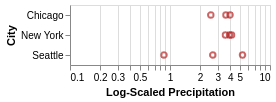

In [11]:
plot = vl.markPoint({color: 'firebrick'})
  .data(df)
  .encode(
    vl.x().fieldQ('precip').scale({type: 'log'}).title('Log-Scaled Precipitation'),
    vl.y().fieldN('city').title('City')
  )

In [36]:
import * as fs from "https://deno.land/std@0.143.0/node/fs.ts";
const cars = JSON.parse(fs.readFileSync('cars.json', 'utf-8'))

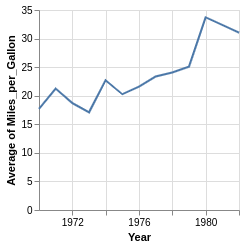

In [37]:
plot = vl.markLine()
  .data(cars)
  .encode(
    vl.x().fieldT('Year'),
    vl.y().average('Miles_per_Gallon')
  )

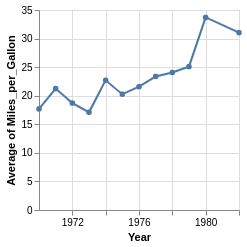

In [38]:
{
  const line = vl.markLine().data(cars).encode(
    vl.x().fieldT('Year'),
    vl.y().average('Miles_per_Gallon')
  );

  const point = vl.markCircle().data(cars).encode(
    vl.x().fieldT('Year'),
    vl.y().average('Miles_per_Gallon')
  );
  
  vl.layer(line, point)
}

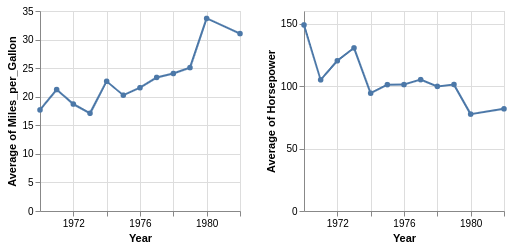

In [18]:
{
  const mpg = vl.markLine().data(cars).encode(
    vl.x().fieldT('Year'),
    vl.y().average('Miles_per_Gallon')
  );
  
  const hp = mpg.encode(vl.y().average('Horsepower'));

  vl.hconcat(
    vl.layer(mpg, mpg.markCircle()),
    vl.layer(hp, hp.markCircle())
  )
}

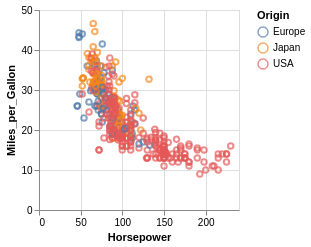

In [39]:
vl.markPoint().data(cars).encode(
  vl.x().fieldQ('Horsepower'),
  vl.y().fieldQ('Miles_per_Gallon'),
  vl.color().fieldN('Origin'),
  vl.tooltip(['Name', 'Origin']) // show the Name and Origin fields in a tooltip
)

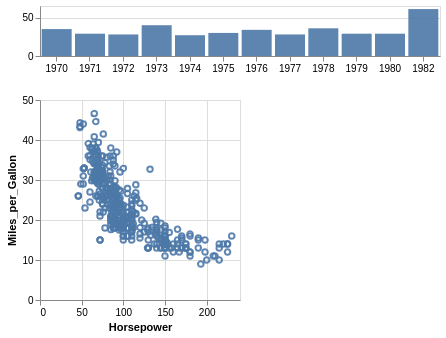

In [20]:
{
  // create an interval selection over an x-axis encoding
  const brush = vl.selectInterval().encodings('x');
  
  // determine opacity based on brush
  const opacity = vl.opacity().if(brush, vl.value(0.9)).value(0.1);

  // an overview histogram of cars per year
  // add the interval brush to select cars over time
  const overview = vl.markBar()
    .encode(
      vl.x().fieldO('Year').timeUnit('year')  // extract year unit, treat as ordinal
        .axis({title: null, labelAngle: 0}),  // no title, no label angle
      vl.y().count().title(null),             // counts, no axis title
      opacity  // modulate bar opacity based on the brush selection
    )
    .params(brush) // add interval brush selection to the chart
    .width(400)    // use the full default chart width
    .height(50);   // set chart height to 50 pixels
  
  // a detail scatterplot of horsepower vs. mileage
  const detail = vl.markPoint()
    .encode(
      vl.x().fieldQ('Horsepower'),
      vl.y().fieldQ('Miles_per_Gallon'),
      opacity  // modulate point opacity based on the brush selection
    );

  // vertically concatenate (vconcat) charts
  vl.data(cars).vconcat(overview, detail);
}